In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dir = '/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets'
%cd $dir

/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [14]:
datos = loadmat("EEG-ERP-1.mat")

In [15]:
EEGa = datos['EEGa']
EEGb = datos['EEGb']
tiempo = datos['t'][0] 
n_ensayos  = EEGa.shape[0] 
n_muestras = EEGb.shape[1]

In [16]:
def Plot_EEG(EEG,tiempo,t_est,c_i,r=0.05):

  mn  = EEG.mean(0)
  sd  = EEG.std(0)
  n_ensayos  = EEG.shape[0] 
  sem = sd/np.sqrt(n_ensayos)


  e_list=[]
  error_mas   = mn+(2*sem)
  error_menos = mn-(2*sem)
  
  for i in range(len(error_mas)):
    if (error_mas[i] > -r and error_mas[i]<r) or (error_menos[i] > -r and error_menos[i]<r):
      e_list.append(0)
    else:
      e_list.append(1)
  
  _,ax = plt.subplots(figsize=(12,3))

  ax.plot(tiempo,mn,color=c_i)
  ax.plot(tiempo,mn+(2*sem),color=c_i,linewidth=0.5)
  ax.plot(tiempo,mn-(2*sem),color=c_i,linewidth=0.5)

  ax.hlines(0,tiempo[0],tiempo[-1],color="black")
  ax.vlines(t_est,-0.3,0.3,color="black")

  for i in range(500):
    if e_list[i]==1 and tiempo[i]>=t_est:
      ax.plot(tiempo[i],0.35, marker="|", markersize=20,color="red")
    if i==499:
      ax.plot(tiempo[i],0.35, marker="|", markersize=20,color="red",label="Puntos de interés")
  
  plt.legend()
  plt.xlabel('Tiempo[s]')
  plt.ylabel('Voltaje [$\mu$V]')
  plt.title("ERP de la condición")

- Nota: Los puntos de interés son aquellos en donde los errores no son 0, sin embargo no existen errores=0, por lo que se tomó un intervalo de -0.05 a 0.05, donde los valores que estén en ese intervalo serán considerados como error, para modificar este intervalo, se puede cambiar el parámetro "r" dentro de la función

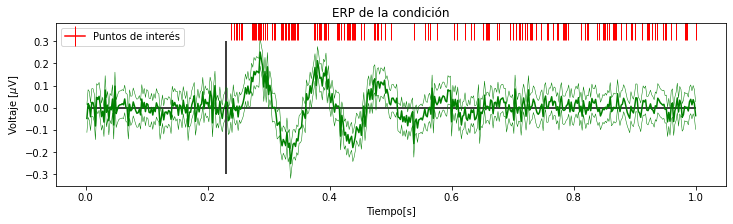

In [17]:
Plot_EEG(EEGa,tiempo,t_est=0.23,c_i="green",r=0.05)

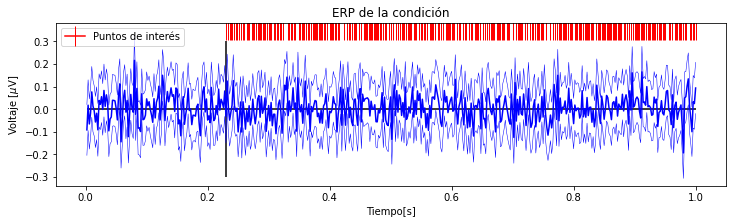

In [18]:
Plot_EEG(EEGb,tiempo,t_est=0.23,c_i="blue",r=0.05)